# Supervised Learning: Classification with sklearn

Let's take a look at some supervised learning examples using sklearn. We'll start with some image classification examples, followed by a look at linear regression. However, one important point: your choice of classification model matters greatly. Different models will excel at different tasks. You can see a comparison of classifiers here:

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

We'll be looking at a few options, but we don't have nearly enough time to cover the details of all. For now, explore and test!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

We'll import our dataset using the keras library. You might recall Keras is another python machine learning library. We're only using it to easily obtain the dataset here; we'll still be doing all our training using sklearn.

In [2]:
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() #returns a tuple of numpy arrays

#X_train: NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
#y_train: NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.
#X_test: NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
#y_test: NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
# For model training speed purposes, we'll cut out the majority of our dataset
X_train = X_train[:1200] #keep only the first 1200 images
y_train = y_train[:1200] #keep only the first 1200 labels
X_test = X_test[:200] #keep only the first 200 images
y_test = y_test[:200] #keep only the first 200 labels

In [6]:
X_train[0] #print first object

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In the dataset, the labels are classified by number:

*    0 = T-shirt/top
*    1 = Trouser
*    2 = Pullover
*    3 = Dress
*    4 = Coat
*    5 = Sandal
*    6 = Shirt
*    7 = Sneaker
*    8 = Bag
*    9 = Ankle boot

In [7]:
y_train[0] #this is the label, i.e. the classification, of X_train[0]

9

We can take a quick look at a subset of images in the dataset by plotting them with matplotlib:

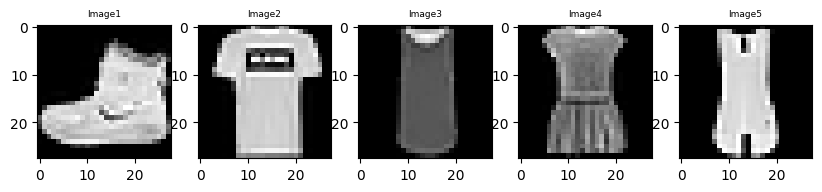

In [8]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row * n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

One important thing we'll need to do in order to prepare our training data, is reduce the dimensionality of our arrays. Currently, they are three dimensional, but models need them to be 2 dimensional.

In [9]:
print(X_train.shape)
print(X_test.shape)

(1200, 28, 28)
(200, 28, 28)


To fix this, we can use the [.reshape() method](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to flatten our 28 x 28 image data:

In [10]:
nsamples, nx, ny = X_train.shape
X_train_d2 = X_train.reshape((nsamples, nx * ny))
nsamples, nx, ny = X_test.shape
X_test_d2 = X_test.reshape((nsamples, nx * ny))\
#makes 1200 x 28 x 28 ---> 1200 x 784

In [11]:
print(X_train_d2.shape)
print(X_test_d2.shape)

(1200, 784)
(200, 784)


Now that we've prepped our training data, we can train a model. We'll start with a [MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). As we discussed earlier, this can work for simple images but struggles with high-res, complex images. But our images here are quite simple, so let's see how it does:

In [32]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(max_iter=5090, tol=1e-5) #choose eour model , set the parameters
MLP_model.fit(X_train_d2,y_train)    #train the model
mlp_predict = MLP_model.predict(X_test_d2)   #try to predict

In [33]:
print(metrics.classification_report(y_test, mlp_predict))
print("average accuracy:", np.mean(y_test == mlp_predict) * 100)

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       1.00      0.96      0.98        27
           2       0.74      0.63      0.68        27
           3       0.63      0.71      0.67        17
           4       0.65      0.81      0.72        21
           5       0.82      0.88      0.85        16
           6       0.58      0.44      0.50        16
           7       0.80      0.80      0.80        20
           8       0.94      0.83      0.88        18
           9       0.76      0.72      0.74        18

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.77      0.77      0.77       200

average accuracy: 77.0


Next let's try a [Logistic Regression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (logistic regression was traditionally designed for binary classifications but has been improved in sklearn to support multi-class classification):

In [34]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class="multinomial",
                                    solver="saga", max_iter=100, tol=1e-3)
lr_model.fit(X_train_d2, y_train)
lr_predict = lr_model.predict(X_test_d2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [33]:
print(metrics.classification_report(y_test, lr_predict))
print("average accuracy:", np.mean(y_test == lr_predict) * 100)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.96      1.00      0.98        27
           2       0.82      0.67      0.73        27
           3       0.81      0.76      0.79        17
           4       0.64      0.67      0.65        21
           5       0.93      0.81      0.87        16
           6       0.48      0.69      0.56        16
           7       0.82      0.90      0.86        20
           8       1.00      0.89      0.94        18
           9       0.89      0.89      0.89        18

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.84      0.82      0.82       200

average accuracy: 82.0


We can try other models, and you can explore on your own as well - simply import the model and take a quick look at the documentation to read up on the parameters to see if any need to be specified.

In [37]:
from sklearn.naive_bayes import GaussianNB

gNB_model = GaussianNB()
gNB_model.fit(X_train_d2,y_train)
nb_predict = gNB_model.predict(X_test_d2)

print(metrics.classification_report(y_test, nb_predict))
print("average accuracy:", np.mean(y_test == nb_predict) * 100)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.83      0.56      0.67        27
           2       0.56      0.37      0.44        27
           3       0.43      0.94      0.59        17
           4       0.43      0.71      0.54        21
           5       0.50      0.19      0.27        16
           6       0.20      0.06      0.10        16
           7       0.49      0.90      0.63        20
           8       0.88      0.83      0.86        18
           9       1.00      0.56      0.71        18

    accuracy                           0.59       200
   macro avg       0.62      0.59      0.56       200
weighted avg       0.63      0.59      0.57       200

average accuracy: 59.0


In [39]:
from sklearn.svm import SVC

svm_model = SVC(max_iter=100, tol=1e-3)
svm_model.fit(X_train_d2,y_train)
svm_predict = svm_model.predict(X_test_d2)

print(metrics.classification_report(y_test, svm_predict))
print("average accuracy:", np.mean(y_test == svm_predict) * 100)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       1.00      1.00      1.00        27
           2       0.75      0.67      0.71        27
           3       0.85      1.00      0.92        17
           4       0.67      0.67      0.67        21
           5       0.88      0.94      0.91        16
           6       0.59      0.62      0.61        16
           7       0.85      0.85      0.85        20
           8       0.94      0.94      0.94        18
           9       0.94      0.89      0.91        18

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200

average accuracy: 84.5


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Principal Component Analysis (PCA)

**Principal Component Analysis** (PCA) is a dimensionality reduction technique used to simplify the complexity of high-dimensional data while preserving most of its important features. It achieves this by transforming the original features into a new set variables called principal components. This can help eliminate redundancy. For example if 10 out of 12 variables all measure similar things, they might be given too much weight. e.g.
*    variable1 = temperature
*    variable2 = humidity
*    variable3 = wind speed

These variables might all be reduced to one feature called weather.




Note that Principal Component Analysis (PCA) can potentially reduce accuracy in some cases because some information may be lost, especially if the new principal components do not capture all the variation in the original data. Likewise, there is a risk that the principal components capture noise rather than signal, resulting in a loss of accuracy.

*    **noise**: irrelevant or random variations in the data that do not represent meaningful patterns or relationships
*    **signal**: meaningful patterns in the data that is relevant to the task at hand

It also assumes a linear relationship between variables - if the relationship between variables is non-linear, PCA may struggle to properly capture the relationships between variables.

In [40]:
from sklearn.decomposition import PCA

#let's redownload the full 60,000 row dataset and use PCA
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
nsamples, nx, ny = X_train.shape
X_train_d2 = X_train.reshape((nsamples, nx * ny))
nsamples, nx, ny = X_test.shape
X_test_d2 = X_test.reshape((nsamples, nx * ny))

#specify the number of principal components to retain
n_components = 400
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_d2)
X_test_pca = pca.fit_transform(X_test_d2)

In [41]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class="multinomial",
                                    solver="saga", max_iter=100, tol=1e-3)
lr_model.fit(X_train_d2, y_train)
lr_predict = lr_model.predict(X_test_d2)

print(metrics.classification_report(y_test, lr_predict))
print("average accuracy:", np.mean(y_test == lr_predict) * 100)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.85      0.84      1000
           4       0.72      0.78      0.75      1000
           5       0.95      0.91      0.93      1000
           6       0.64      0.56      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.93      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

average accuracy: 84.16


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Exercise: Training a Classification Model

We just learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has images of handwriting -- specifically handwritten digits 0 through 9.

*    Write an MNIST classifier that is trained to recognise the written digit. I've started the code for you below -- how would you finish it? What's the best accuracy you can achieve?

In [42]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [44]:
y_train[0] #once again, this is the label, i.e. classification, of X_train[0]

5

In [45]:
nsamples, nx, ny = X_train.shape
X_train_d2 = X_train.reshape((nsamples, nx * ny))
nsamples, nx, ny = X_test.shape
X_test_d2 = X_test.reshape((nsamples, nx * ny))

In [54]:
print(X_train_d2.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [55]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class="multinomial",
                                    solver="saga", max_iter=100, tol=1e-3)
lr_model.fit(X_train_d2, y_train)
lr_predict = lr_model.predict(X_test_d2)

print(metrics.classification_report(y_test, lr_predict))
print("average accuracy:", np.mean(y_test == lr_predict) * 100)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.91      0.86      0.88       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

average accuracy: 92.57


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [56]:
from sklearn.svm import SVC

svm_model = SVC(max_iter=100, tol=1e-3)
svm_model.fit(X_train_d2,y_train)
svm_predict = svm_model.predict(X_test_d2)

print(metrics.classification_report(y_test, svm_predict))
print("average accuracy:", np.mean(y_test == svm_predict) * 100)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.87      0.90       982
           5       0.97      0.92      0.94       892
           6       0.98      0.98      0.98       958
           7       0.96      0.80      0.87      1028
           8       0.92      0.94      0.93       974
           9       0.73      0.91      0.81      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

average accuracy: 92.71000000000001


In [58]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(max_iter=5000, tol=1e-8) #choose eour model , set the parameters
MLP_model.fit(X_train_d2,y_train)    #train the model
mlp_predict = MLP_model.predict(X_test_d2)   #try to predict

print(metrics.classification_report(y_test, mlp_predict))
print("average accuracy:", np.mean(y_test == mlp_predict) * 100)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.95      0.94      0.94       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.94      0.96      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

average accuracy: 96.44


In [51]:
from sklearn.naive_bayes import GaussianNB

gNB_model = GaussianNB()
gNB_model.fit(X_train_d2,y_train)
nb_predict = gNB_model.predict(X_test_d2)

print(metrics.classification_report(y_test, nb_predict))
print("average accuracy:", np.mean(y_test == nb_predict) * 100)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000

average accuracy: 55.58


In [52]:
from sklearn.linear_model import SGDRegressor

sgdr_model = SGDRegressor(max_iter=500, tol=1e-3)
sgdr_model.fit(X_train_d2,y_train)
sgdr_predict = sgdr_model.predict(X_test_d2)

print(metrics.classification_report(y_test, sgdr_predict))
print("average accuracy:", np.mean(y_test == sgdr_predict) * 100)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets